In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949', skiprow=7) #위쪽7줄 스킵
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949')
df = df.replace(',','',regex=True)
df.shape

(598, 53)

In [15]:
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,1148,21,11958,10579,15684,61286,...,22083,4127,7762,3,548,0,0,0,0,2019-06-03 10:56:25


In [16]:
df0 = df.drop(0) # 좌측에 0(index) 이라고 써진 행을 버려라.
df0.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,1148,21,11958,10579,15684,61286,...,22083,4127,7762,3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,2843,4674,4169,24963,...,4767,931,1426,1,25,0,0,0,0,2019-06-03 10:56:25


출근 시간대에 사람들이 가장 많이 타고 내리는 역은 어딜까
- 출근 시간대는 언제인가 새벽 ~ 09:00
- 상위 10개역 : 정렬해서 큰수10개를 자른다.(mask)
- 타는 역 / 내리는 역

<BarContainer object of 2 artists>

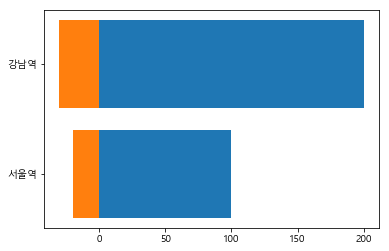

In [19]:
plt.rc('font', family='Malgun Gothic')
plt.barh(['서울역','강남역'],[100,200])
plt.barh(['서울역','강남역'],[-20, -30])

In [27]:
출근시간시작위치 = 4
출근시간끝위치 = 13
arr = np.array(df0)
역별승차인원 = arr[:,출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:,출근시간시작위치+1:출근시간끝위치+1:2].astype(np.int)
arr.shape, 역별승차인원[0], 역별하차인원[0]

((597, 53),
 array([ 1148, 11958, 15684, 44585, 89357]),
 array([    21,  10579,  61286, 115354, 238583]))

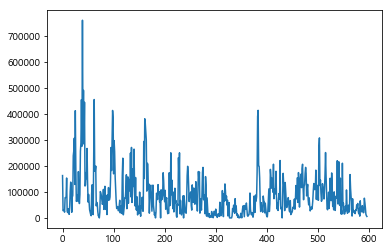

In [29]:
plt.rc('font', family='Malgun Gothic')
m = plt.plot(np.sum(역별승차인원,axis=1))


In [33]:
역별승차인원합 = np.sum(역별승차인원,axis=1)
역별하차인원합 = np.sum(역별하차인원,axis=1)

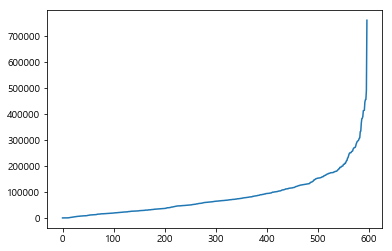

In [34]:
plt.rc('font', family='Malgun Gothic')
m = plt.plot(np.sort(역별승차인원합))

In [35]:
상위개수 = 10
기준값 = np.sort(역별승차인원합)[-상위개수] # 기준값

In [41]:
마스크 = 역별승차인원합 >= 기준값
역별승차인원합[마스크], len(역별승차인원합[마스크])

(array([412219, 454340, 759642, 490300, 444523, 454963, 412919, 382801,
        389612, 413462]), 10)

In [42]:
역이름 = arr[:,3]

In [43]:
역이름[마스크]

array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
       '수유(강북구청)', '화곡', '까치산'], dtype=object)

<BarContainer object of 10 artists>

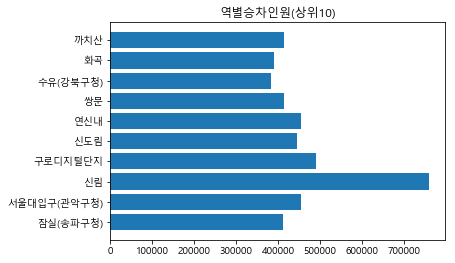

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.title('역별승차인원(상위'+str(상위개수)+')')
plt.barh(역이름[마스크],역별승차인원합[마스크])

밤 11시에 사람들이 가장많이타는 10개역은 어디일까요

In [50]:
퇴근시간시작위치 = -11
arr = np.array(df0)
역별승차인원 = arr[:,퇴근시간시작위치].astype(np.int)

In [52]:
역별승차인원[0]

37939

In [54]:
np.max(역별승차인원), np.argmax(역별승차인원)

(151504, 48)

In [62]:
arr[np.argmax(역별승차인원),3]

'홍대입구'

In [70]:
기준값2=np.sort(역별승차인원)[-상위개수]
마스크2=역별승차인원 >=기준값2

In [73]:
역이름[마스크2], 역별승차인원[마스크2]

(array(['종각', '건대입구', '잠실(송파구청)', '강남', '사당', '합정', '홍대입구', '신촌', '혜화',
        '명동'], dtype=object),
 array([ 48067,  78429,  48786, 128937,  50264,  42696, 151504,  74678,
         55240,  43998]))

<BarContainer object of 10 artists>

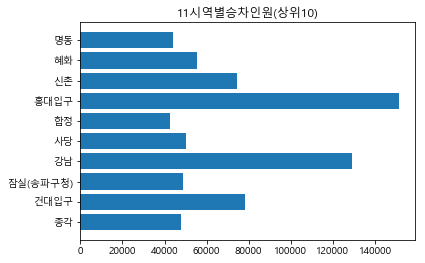

In [74]:
plt.rc('font', family='Malgun Gothic')
plt.title('11시역별승차인원(상위'+str(상위개수)+')')
plt.barh(역이름[마스크2],역별승차인원[마스크2])